In [3]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd
import scipy.stats as sps
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from mlxtend.feature_selection import SequentialFeatureSelector 
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from datetime import datetime

In [6]:
#read datasets 
tt = pd.read_csv("training_testing.csv")
oot = pd.read_csv("out_of_time.csv")
KSFDR = pd.read_csv("KSFDR.csv")

In [45]:
KSFDR = pd.read_csv("KSFDR.csv")

In [50]:
KSFDR.shape

(288, 6)

In [5]:
# spliting training and testing here 

from sklearn.model_selection import train_test_split
train, test = train_test_split(tt, test_size=0.2,random_state=42)

In [55]:
#drop 2 variables and select 50 variables from KSFDR 
KSFDR.drop(KSFDR.loc[KSFDR['var']=='fraud_label'].index, inplace=True)
KSFDR.drop(KSFDR.loc[KSFDR['var']=='random'].index, inplace=True)

In [56]:
KSFDR.shape

(286, 6)

In [57]:
var_top50 = KSFDR.nlargest(50,['average_rank']).copy()
var_top50 = list(var_top50['var'])

In [79]:
var_top50

['addr_lag30_count',
 'address_lag30_count',
 'addr_#days_since',
 'address_#days_since',
 'address_lag14_count',
 'addr_lag14_count',
 'address_lag7_count',
 'addr_lag7_count',
 'address_lag3_count',
 'addr_lag3_count',
 'address_lag1_count',
 'addr_lag1_count',
 'addr-homephone_lag30_count',
 'ssn-dob_lag30_count',
 'name-dob_lag30_count',
 'ssn_lag30_count',
 'ssn-name-dob_lag30_count',
 'ssn-firstname_lag30_count',
 'addr-homephone_#days_since',
 'ssn-lastname_lag30_count',
 'ssn-name_lag30_count',
 'ssn-dob_#days_since',
 'addr-homephone_lag14_count',
 'name-dob_#days_since',
 'ssn_#days_since',
 'ssn-firstname_#days_since',
 'ssn-name-dob_#days_since',
 'ssn-lastname_#days_since',
 'name-dob_lag14_count',
 'ssn-name_#days_since',
 'ssn-dob_lag14_count',
 'ssn_lag14_count',
 'name_lag30_count',
 'ssn-name-dob_lag14_count',
 'ssn-firstname_lag14_count',
 'ssn-lastname_lag14_count',
 'ssn-name_lag14_count',
 'address_lag1_lag14_avg',
 'addr_lag1_lag14_avg',
 'addr-homephone_lag7_cou

In [61]:
#build train_x and train_y
train_x = np.array(train[train.columns.intersection(var_top50)])
train_y = np.array(train['fraud_label'])

In [104]:
train_x

array([[ 67.,   1.,   1., ...,   1.,   1.,   1.],
       [289.,   1.,   1., ...,   1.,   1.,   1.],
       [285.,   1.,   1., ...,   1.,   1.,   1.],
       ...,
       [ 63.,   1.,   1., ...,   1.,   1.,   1.],
       [259.,   1.,   1., ...,   1.,   1.,   1.],
       [ 58.,   1.,   1., ...,   1.,   1.,   1.]])

## SFS

In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector 
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from datetime import datetime

In [67]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        tmin, tsec = divmod((datetime.now() - start_time).total_seconds(), 60)
        print('\n Time taken: %i minutes and %s seconds.' % (tmin, round(tsec, 2)))

In [68]:
model = LogisticRegression()
sfs = SequentialFeatureSelector(model, k_features=(15,25),
                                forward=True, floating=False, scoring='roc_auc', cv=2, verbose=2, n_jobs=-1)

In [69]:
# Estimate feature importance and time the whole process
starttime = timer(None)
start_time = timer(None)
sfs.fit(train_x, train_y)
timer(start_time)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.6s finished

[2020-03-09 23:23:03] Features: 1/25 -- score: 0.6726722783655511[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:   25.0s finished

[2020-03-09 23:23:28] Features: 2/25 -- score: 0.754464416993035[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   29.0s finished

[2020-03-09 23:23:57] Features: 3/25 -- score: 0.7804285173649983[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  47 out of


 Time taken: 43 minutes and 2.39 seconds.


[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:  2.4min finished

[2020-03-10 00:05:38] Features: 25/25 -- score: 0.7859916000228226

In [ ]:
#Time taken: 43 minutes and 2.39 seconds.

In [24]:
print(sfs.subsets_)
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)

{1: {'feature_idx': (49,), 'cv_scores': array([1., 1.]), 'avg_score': 1.0, 'feature_names': ('49',)}, 2: {'feature_idx': (0, 49), 'cv_scores': array([1., 1.]), 'avg_score': 1.0, 'feature_names': ('0', '49')}, 3: {'feature_idx': (0, 1, 49), 'cv_scores': array([1., 1.]), 'avg_score': 1.0, 'feature_names': ('0', '1', '49')}, 4: {'feature_idx': (0, 1, 2, 49), 'cv_scores': array([1., 1.]), 'avg_score': 1.0, 'feature_names': ('0', '1', '2', '49')}, 5: {'feature_idx': (0, 1, 2, 3, 49), 'cv_scores': array([1., 1.]), 'avg_score': 1.0, 'feature_names': ('0', '1', '2', '3', '49')}, 6: {'feature_idx': (0, 1, 2, 3, 4, 49), 'cv_scores': array([1., 1.]), 'avg_score': 1.0, 'feature_names': ('0', '1', '2', '3', '4', '49')}, 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 49), 'cv_scores': array([1., 1.]), 'avg_score': 1.0, 'feature_names': ('0', '1', '2', '3', '4', '5', '49')}, 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 49), 'cv_scores': array([1., 1.]), 'avg_score': 1.0, 'feature_names': ('0', '1', '2', '3', '4',

<Figure size 1152x648 with 0 Axes>

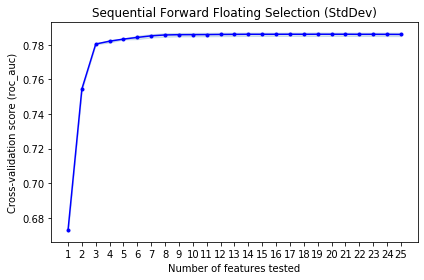

In [73]:
plt.figure(figsize=(16, 9))
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev', marker='.', ylabel='Cross-validation score (roc_auc)')
plt.title('Sequential Forward Floating Selection (StdDev)')
plt.xlabel('Number of features tested')
plt.ylabel('Cross-validation score (roc_auc)')
plt.tight_layout()

In [112]:
scoredf = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [71]:
print(' Best score: .%6f' % sfs.k_score_)
print(' Optimal number of features: %d' % len(sfs.k_feature_idx_))
print(' The selected features are:')
print(sfs.k_feature_names_)

 Best score: .0.786093
 Optimal number of features: 19
 The selected features are:
('1', '4', '9', '10', '11', '12', '15', '17', '20', '21', '23', '24', '32', '36', '37', '39', '40', '41', '44')


In [111]:
#match feature index with feature names 
select_features_index = list(sfs.k_feature_idx_)
select_features =[]

i = 0
for i in select_features_index:
    select_features.append(var_top50[i])
    i = i + 1

print(select_features)

['address_lag30_count', 'address_lag14_count', 'addr_lag3_count', 'address_lag1_count', 'addr_lag1_count', 'addr-homephone_lag30_count', 'ssn_lag30_count', 'ssn-firstname_lag30_count', 'ssn-name_lag30_count', 'ssn-dob_#days_since', 'name-dob_#days_since', 'ssn_#days_since', 'name_lag30_count', 'ssn-name_lag14_count', 'address_lag1_lag14_avg', 'addr-homephone_lag7_count', 'name-dob_lag7_count', 'ssn-dob_lag7_count', 'ssn_lag7_count']


## log regression

In [137]:
#update train, test, oot dataset 
X_train = np.array(train[train.columns.intersection(select_features)])
Y_train = np.array(train['fraud_label'])
X_test = np.array(test[test.columns.intersection(select_features)])
Y_test = np.array(test['fraud_label'])
X_oot = np.array(oot[oot.columns.intersection(select_features)])
Y_oot = np.array(oot['fraud_label'])

### training

In [ ]:
logreg  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None,tol=0.0001,
          verbose=0, warm_start=False)

In [148]:
#log regression on train
logreg  = LogisticRegression(max_iter=5000)

logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
y_pred_tn = logreg.predict(X_train)

In [150]:
#score for train by log model 
log_socre_tn = roc_auc_score(Y_train, y_pred_tn)
print('score for train by log model :',log_socre_tn)

score for train by log model : 0.6844527686709043


In [151]:
#3% FDR for training 

a = int(round(len(X_train)*0.03))

train_1 = train.copy()
train_1['pred_score'] = y_pred_tn 

print("3% FDR for training is ",train_1[:a]['pred_score'].sum()/a * 100)

3% FDR for training is  0.539832285115304


### testing

In [152]:
#log regression on test
logreg.fit(X_test, Y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
y_pred_ts = logreg.predict(X_test)

In [154]:
#score for test by log model
log_socre_ts = roc_auc_score(Y_test, y_pred_ts)
print('score for train by log model :',log_socre_ts)

score for train by log model : 0.669726766185646


In [155]:
#3% FDR for training 

b = int(round(len(X_train)*0.03))

test_1 = test.copy()
test_1['pred_score'] = y_pred_ts 

print("3% FDR for training is ",test_1[:b]['pred_score'].sum()/b * 100)

3% FDR for training is  0.5817610062893082


### oot

In [156]:
logreg.fit(X_oot, Y_oot)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
y_pred_oo = logreg.predict(X_oot)

In [158]:
log_socre_oo = roc_auc_score(Y_oot, y_pred_oo)
print('score for train by log model :',log_socre_oo)

score for train by log model : 0.6574999347097621


In [159]:
#3% FDR for training 

c = int(round(len(X_oot)*0.03))

oot_1 = oot.copy()
oot_1['pred_score'] = y_pred_oo 

print("3% FDR for training is ",oot_1[:c]['pred_score'].sum()/c * 100)

3% FDR for training is  0.5605605605605605
